# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mujadid Choirus Surya
- **Email:** mujadidsurya@gmail.com
- **ID Dicoding:** mujadidsurya

## About Data


Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian
kembali telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya
kembali ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari
lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam lalu lintas,
masalah lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh
sistem ini membuatnya menarik untuk diteliti. Dibandingkan dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi
perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi
jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting
penting di kota dapat dideteksi melalui pemantauan data ini.

Proses penyewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan  
catatan historis dua tahun yang berkaitan dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., Amerika Serikat



- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaan Bisnis

- Apa dampak kondisi cuaca terhadap penyewaan sepeda dan apakah perubahan musim dan cuaca mempengaruhi pola penyewaan sepeda pada setiap bulannya?
- Apa perbedaan antara pengguna biasa dan pengguna terdaftar dalam hal perilaku penyewaan sepeda?
- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda setiap jamnya antara hari kerja dan akhir pekan?
- Bagaimana pola penyewaan sepeda oleh pengguna biasa dan pengguna terdaftar pada hari-hari tertentu dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv')

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


**Insight:**
- hour.csv: jumlah pengguna sepeda yang diagregasi setiap jam. Record 17379 jam
- day.csv: jumlah penggunaan sepeda yang dikumpulkan secara harian. Record 731 hari

### Assessing Data

In [ ]:
print(hour_df.info())
print('-----------------------------------------------------------')
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
--------------------------------------------

In [ ]:
print('\nInfo data missing value hour:\n', hour_df.isnull().sum())
print('\nInfo data missing value day:\n', day_df.isnull().sum())


Info data missing value hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info data missing value day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print('Info data duplikat hour:', hour_df.duplicated().sum())
print('Info data duplikat day', day_df.duplicated().sum())

Info data duplikat hour: 0
Info data duplikat day 0


In [ ]:
print('\nData describe hour:\n', hour_df.describe(include='all'))
print('\nData describe day:\n', day_df.describe(include='all'))


Data describe hour:
            instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday   

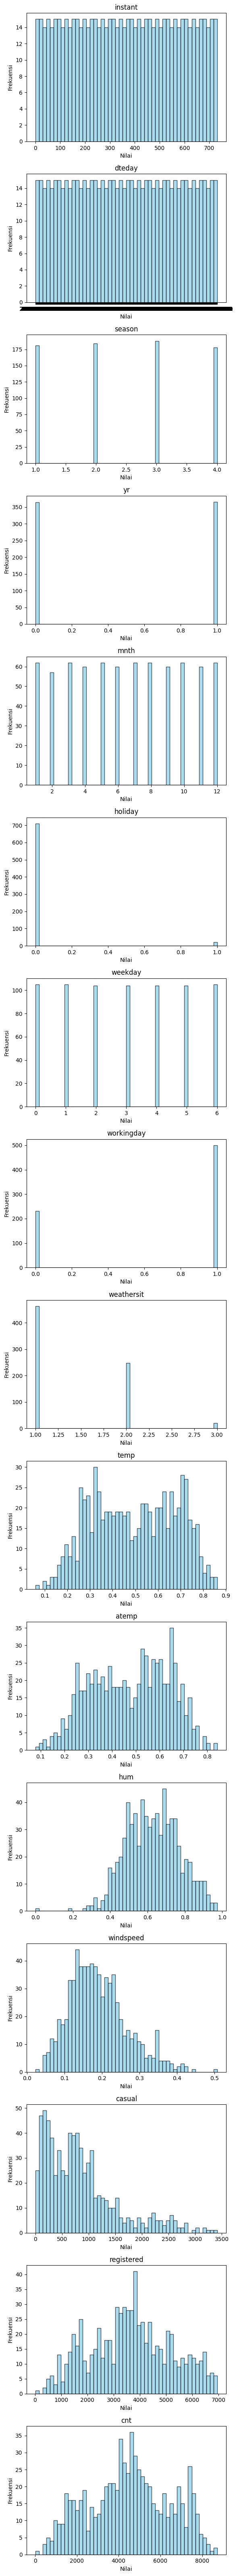

In [ ]:
fig, axs = plt.subplots(nrows=len(day_df.columns), ncols=1, figsize=(6, 4*len(day_df.columns)))

# Create histogram untuk setiap kolom
for i, col in enumerate(day_df.columns):
    axs[i].hist(day_df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xlabel('Nilai')
    axs[i].set_ylabel('Frekuensi')

# Show plot
plt.tight_layout()
plt.show()

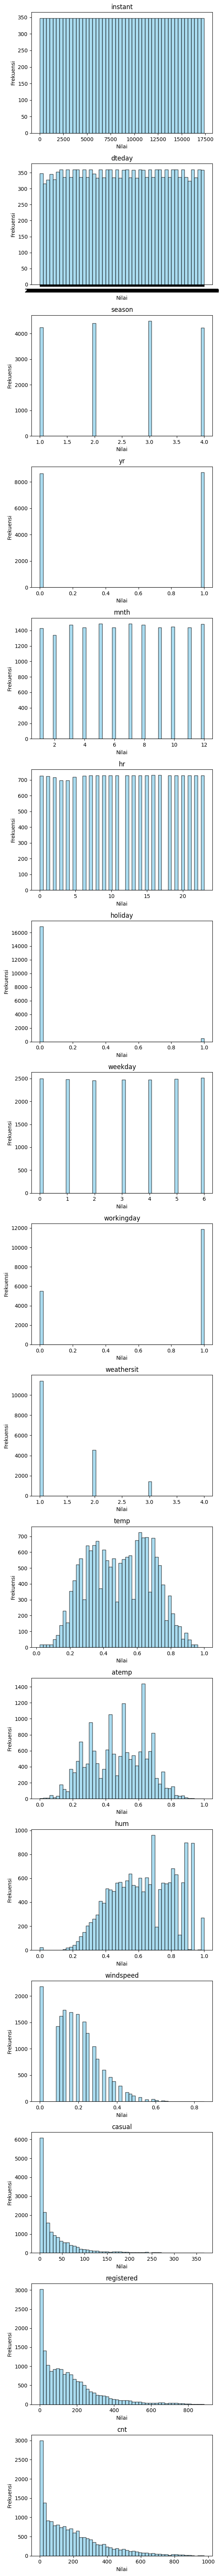

In [ ]:
fig, axs = plt.subplots(nrows=len(hour_df.columns), ncols=1, figsize=(6, 4*len(hour_df.columns)))

# Create histogram untuk setiap kolom
for i, col in enumerate(hour_df.columns):
    axs[i].hist(hour_df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xlabel('Nilai')
    axs[i].set_ylabel('Frekuensi')

# Show plot
plt.tight_layout()
plt.show()

**Insight:**
- Tidak terdapat missing value dan data duplicate dari kedua dataset
- Melakukan describe dan melakuan visualisasi data terhadap data numerik menjadi histogram untuk melihat sebaran data


### Cleaning Data

#### Mengubah nama kolom agar lebih mudah dipahami

In [ ]:
day_df = day_df.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
print(day_df.columns)

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


In [ ]:
hour_df = hour_df.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
print(hour_df.columns)

Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


#### Merubah beberapa nilai numerik menjadi nama sebenarnya untuk memudahkan pemahaman dalam visualisai

In [ ]:
month_map = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
             5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
             9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}

hour_df['month'] = hour_df['month'].map(month_map)
day_df['month'] = day_df['month'].map(month_map)

In [ ]:
year_map = {0: '2011', 1: '2012'}

hour_df['year'] = hour_df['year'].map(year_map)
day_df['year'] = day_df['year'].map(year_map)

In [ ]:
season_map = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}

hour_df['season'] = hour_df['season'].map(season_map)
day_df['season'] = day_df['season'].map(season_map)

In [ ]:
weather_map = {1: 'Cerah', 2: 'Mendung', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}

hour_df['weather'] = hour_df['weather'].map(weather_map)
day_df['weather'] = day_df['weather'].map(weather_map)

In [ ]:
weekday_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
weather_rentals = day_df.groupby('weather')['count'].sum().reset_index()
print(weather_rentals)

        weather    count
0         Cerah  2257952
1  Hujan Ringan    37869
2       Mendung   996858


In [ ]:
casual_users = hour_df['casual'].sum()
registered_users = hour_df['registered'].sum()

print(f"Jumlah pengguna casual: {casual_users}")
print(f"Jumlah pengguna register: {registered_users}")

Jumlah pengguna casual: 620017
Jumlah pengguna register: 2672662


**Insight:**
- Pengguna penyewaan sepeda banyak pada cuaca cerah dan paling sedikit pada cuaca gerimis
- Jumlah pengguna terdaftar lebih banyak dibandingkan pengguna biasa

## Visualization & Explanatory Analysis

### Apa dampak kondisi cuaca terhadap penyewaan sepeda dan apakah perubahan musim dan cuaca mempengaruhi pola penyewaan sepeda pada setiap bulannya?

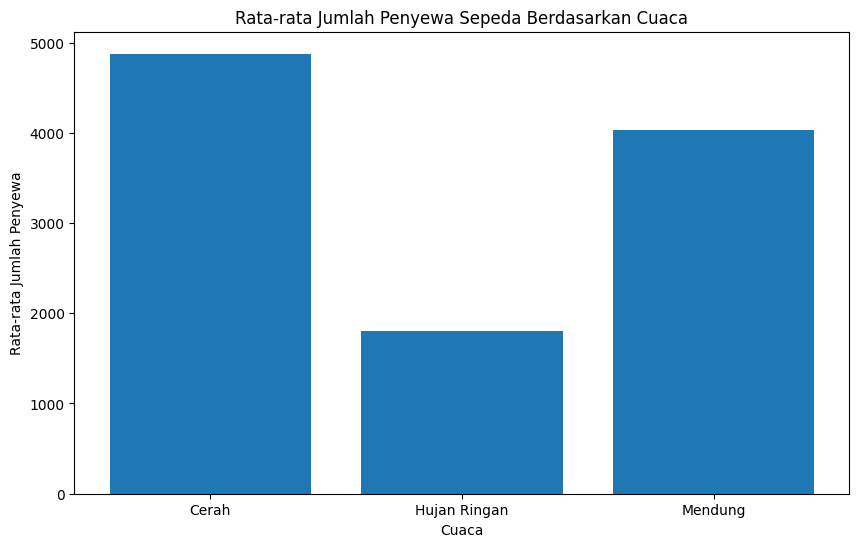

In [ ]:
weather_rentals = day_df.groupby('weather')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(weather_rentals['weather'], weather_rentals['count'])
plt.title('Rata-rata Jumlah Penyewa Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.show()

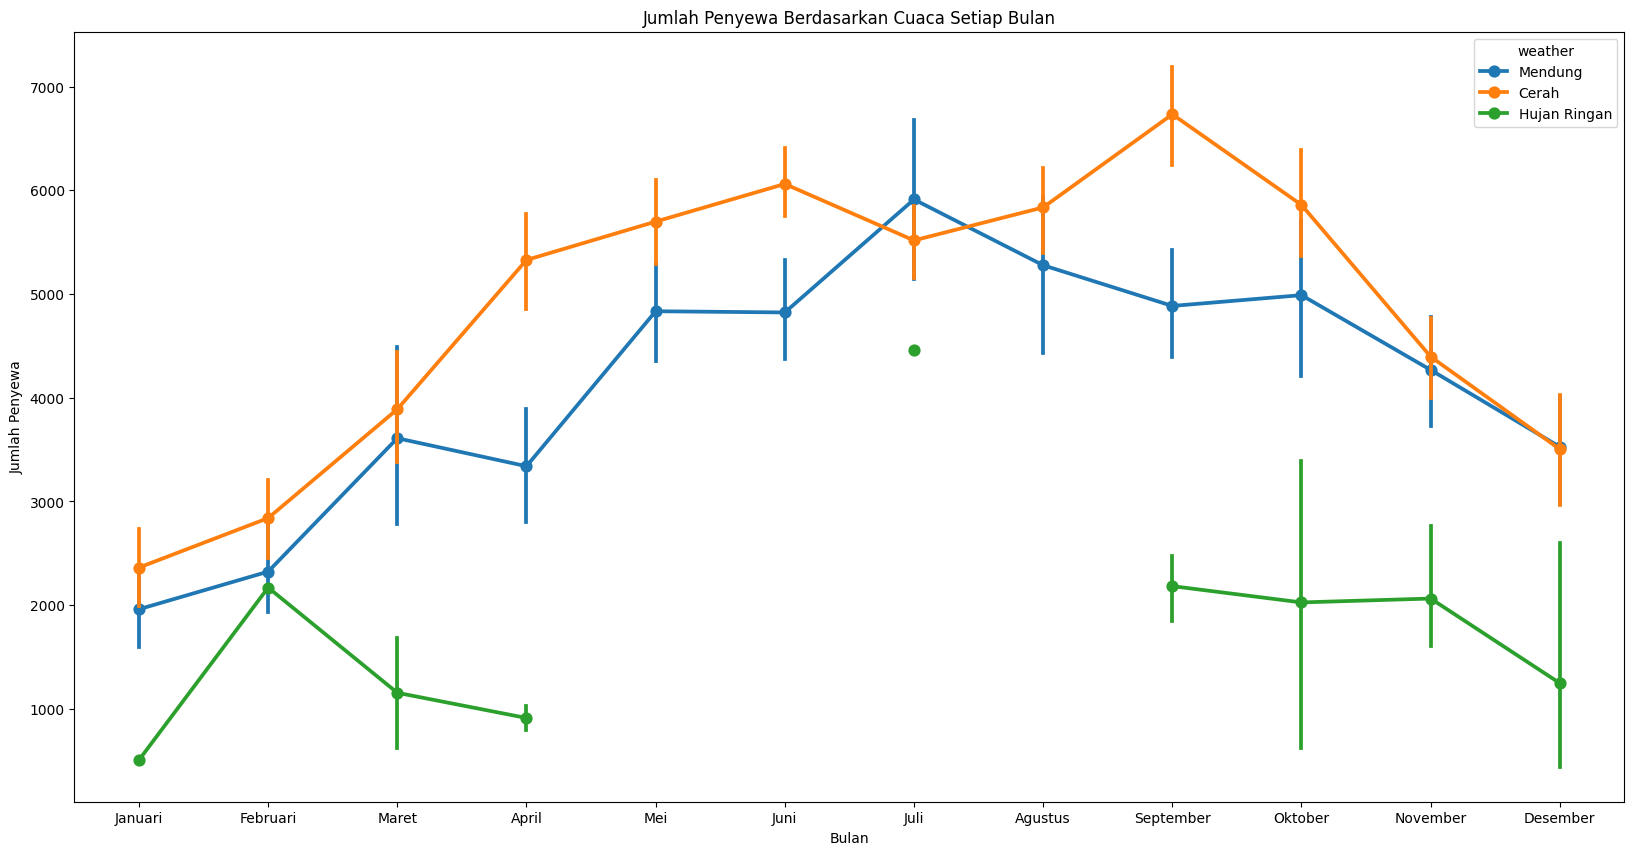

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df, x='month', y='count', hue='weather')
plt.title('Jumlah Penyewa Berdasarkan Cuaca Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.show()

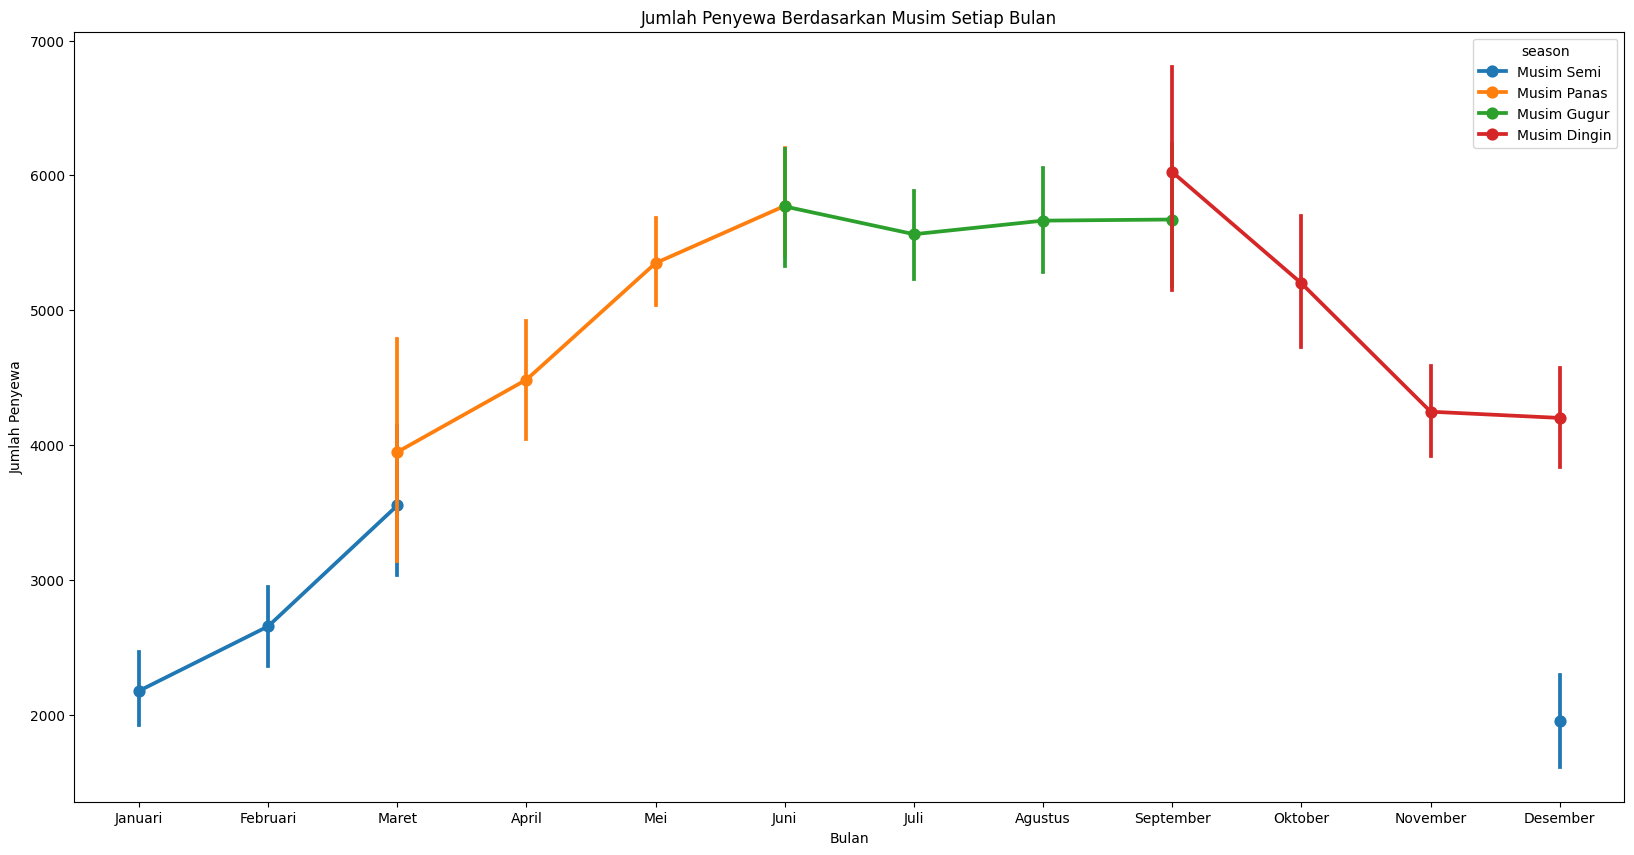

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df, x='month', y='count', hue='season')
plt.title('Jumlah Penyewa Berdasarkan Musim Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.show()

### Apa perbedaan antara pengguna biasa dan pengguna terdaftar dalam hal perilaku penyewaan sepeda?

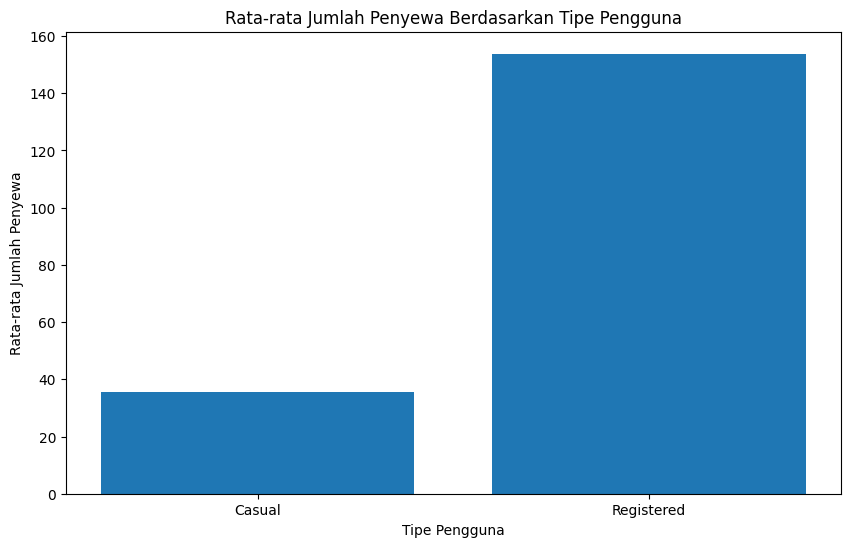

In [ ]:
casual_mean = hour_df['casual'].mean()
registered_mean = hour_df['registered'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Casual', 'Registered'], [casual_mean, registered_mean])
plt.title('Rata-rata Jumlah Penyewa Berdasarkan Tipe Pengguna')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.show()

### Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda setiap jamnya antara hari kerja dan akhir pekan?

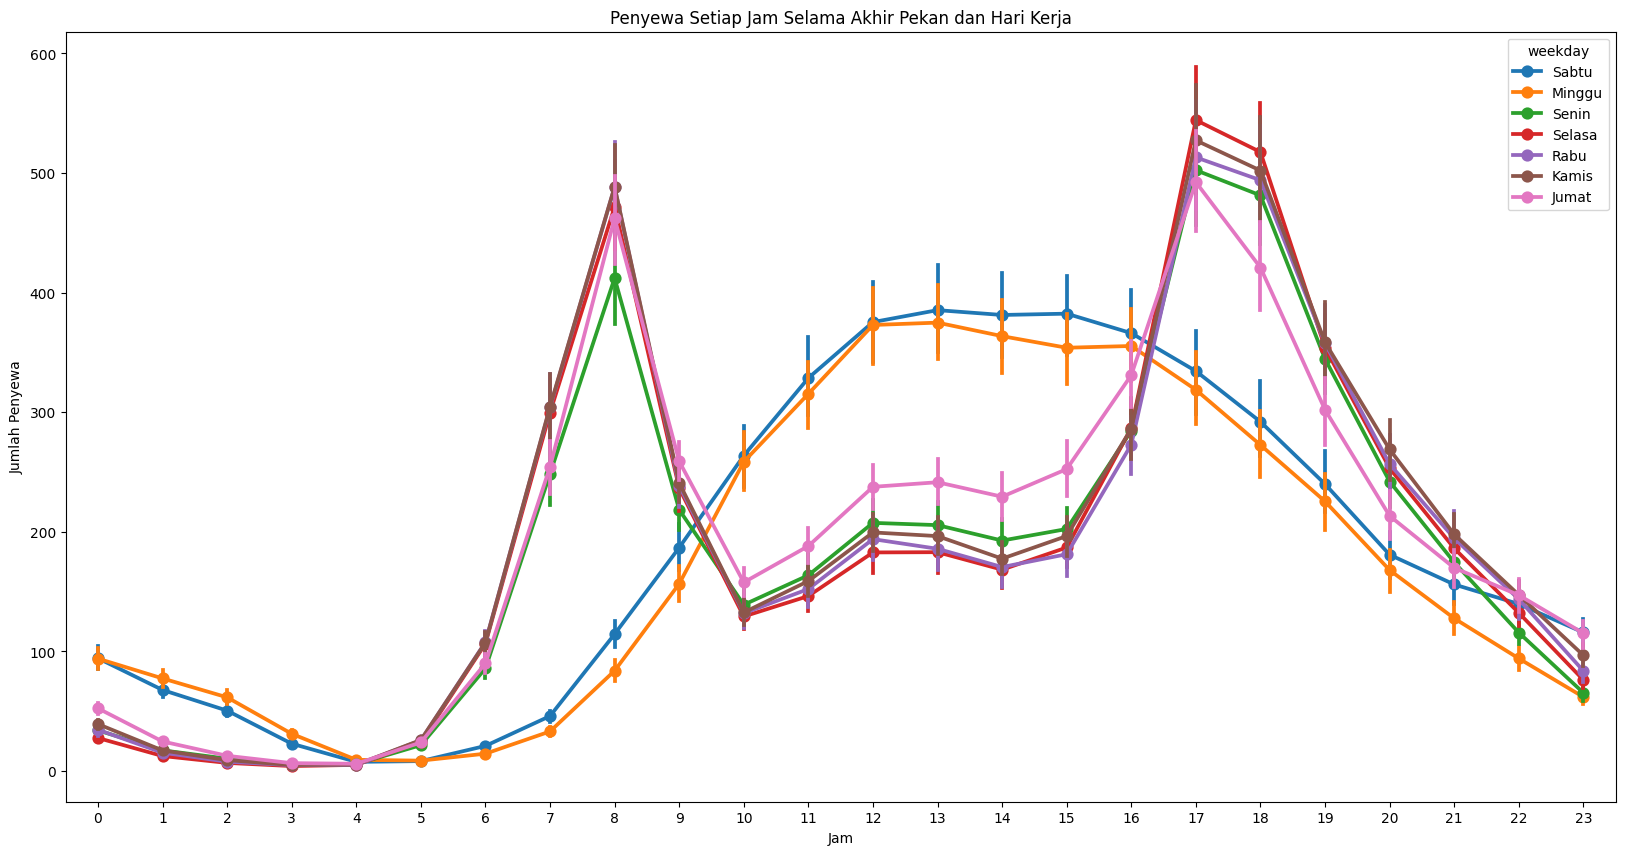

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weekday')
plt.title('Penyewa Setiap Jam Selama Akhir Pekan dan Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.show()

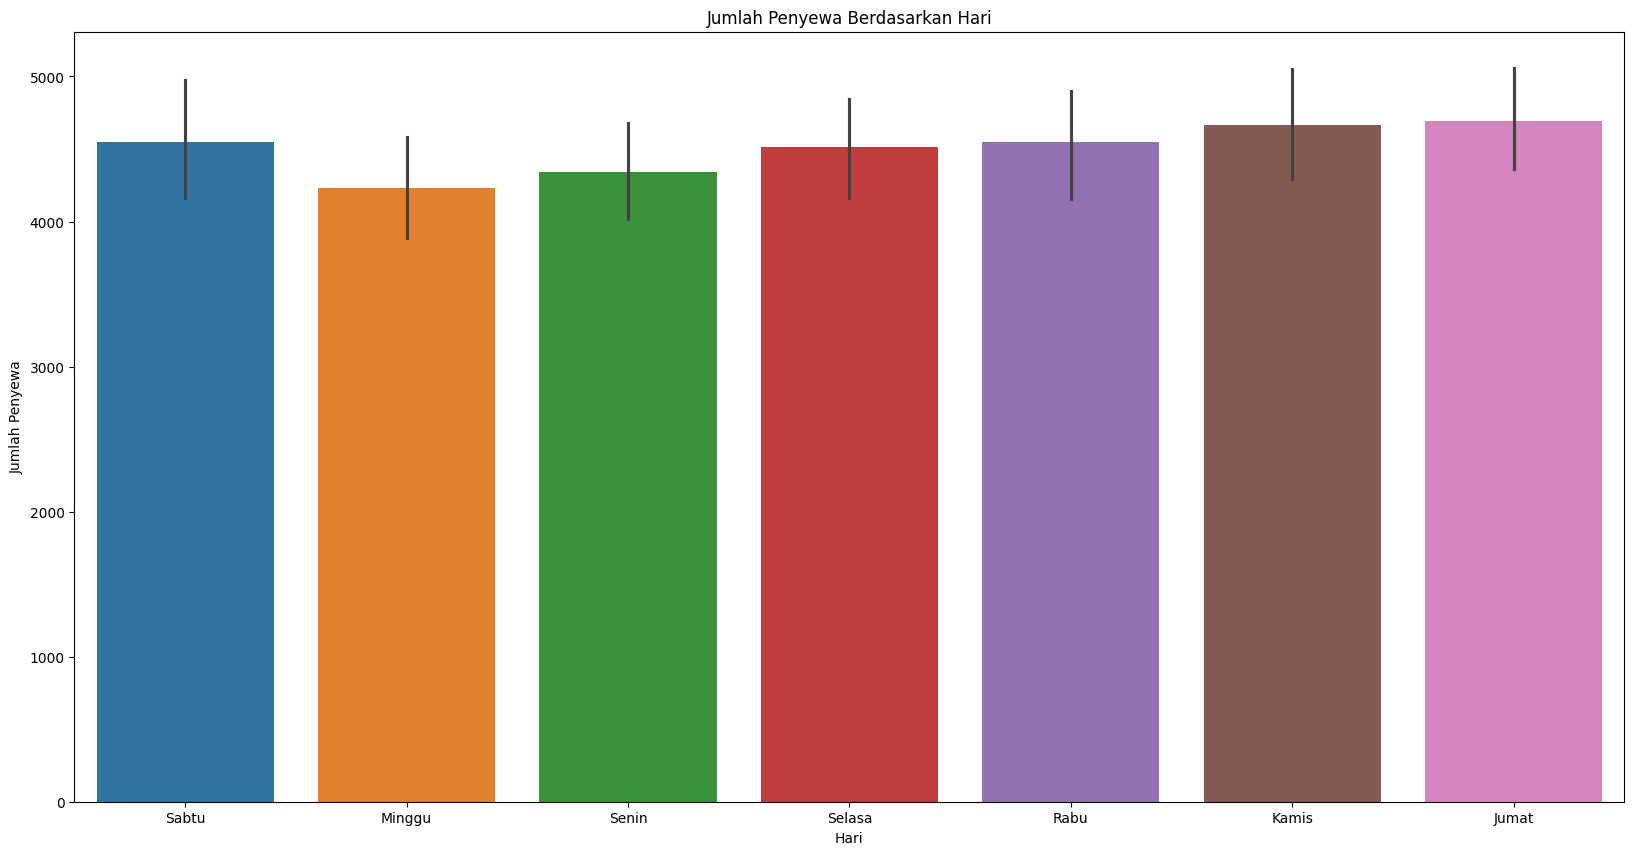

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=day_df, x='weekday', y='count', hue='weekday')
plt.title('Jumlah Penyewa Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewa')
plt.show()

**Insight:**

1. Para pengguna cenderung melakukan penyewaan sepeda pada cuaca yang cerah dan Mendung. Sedangkan pada cuaca gerimis dan hujan lebat sangat sedikit pengguna yang melakukan penyewaan sepeda. Hal ini mengakibatkan penyewaan sepeda mengalami penurunan pada bulan dimana musim semi terjadi, karena pada musim tersebut sering terjadi hujan
2. Para pengguna mayoritas sudah melakukan pendaftaran namun ada sekitar 20% masih menjadi pengguna biasa
3. Jumlah penyewa pada hari kerja meningkat pada jam 7-9 dan jam 17-18 yang merupakan jam berangkat dan pulang kerja. Sedangkan pada libur jumlah penyewa banyak pada siang dan sore hari dari pukul 10-18. Namun jumlah penyewa sepeda setiap harinya tidak terlalu berbeda.

## Analisis Lanjutan (Opsional)

### Bagaimana pola penyewaan sepeda oleh pengguna biasa dan pengguna terdaftar pada hari-hari tertentu dalam seminggu?

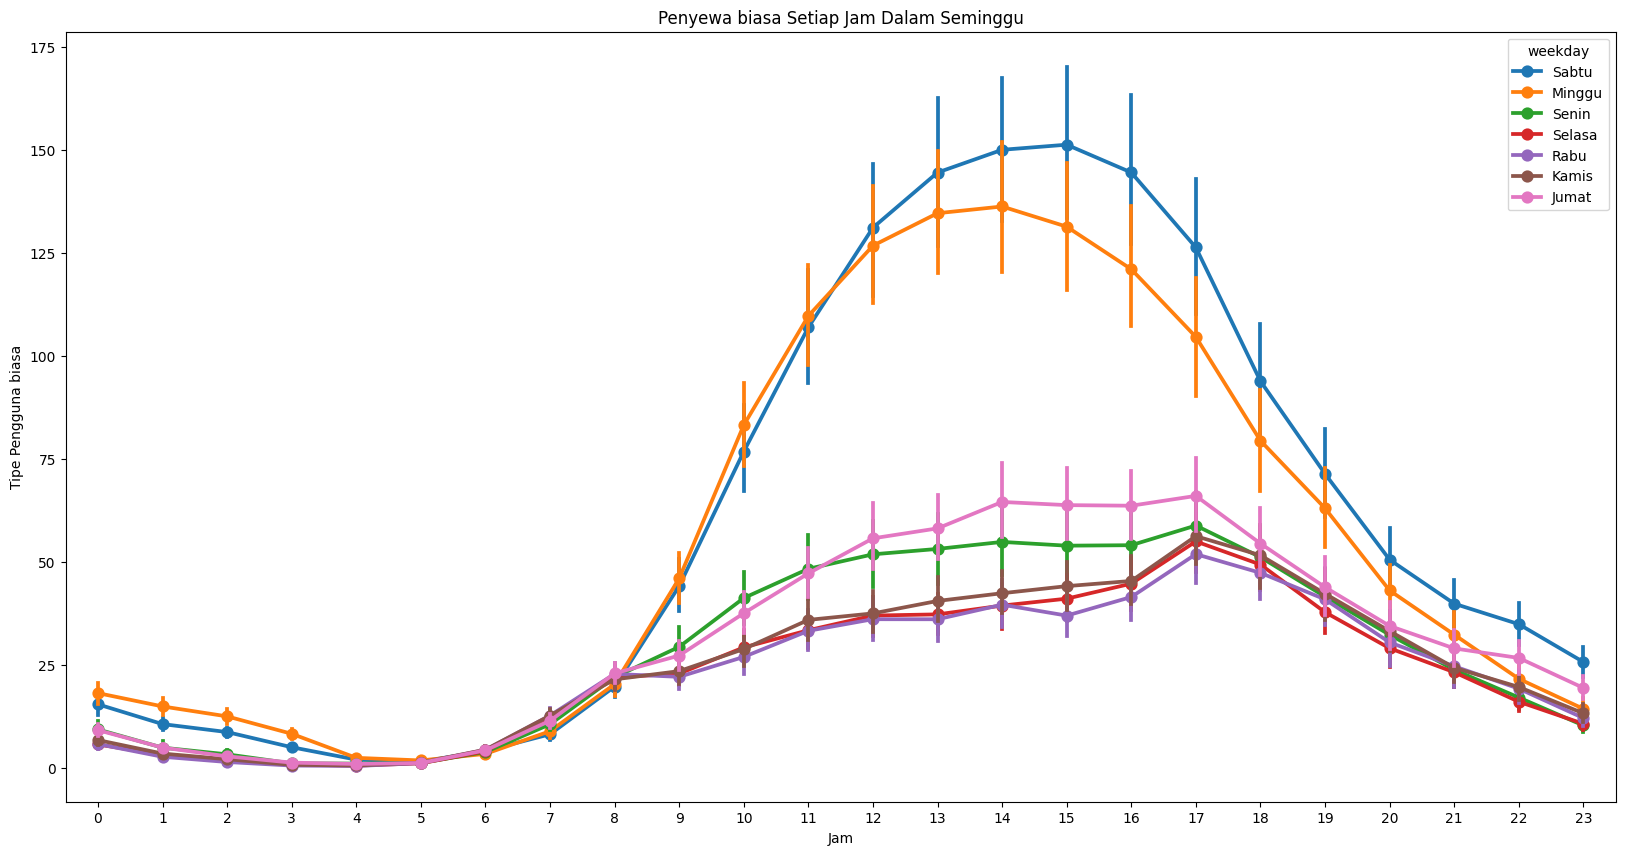

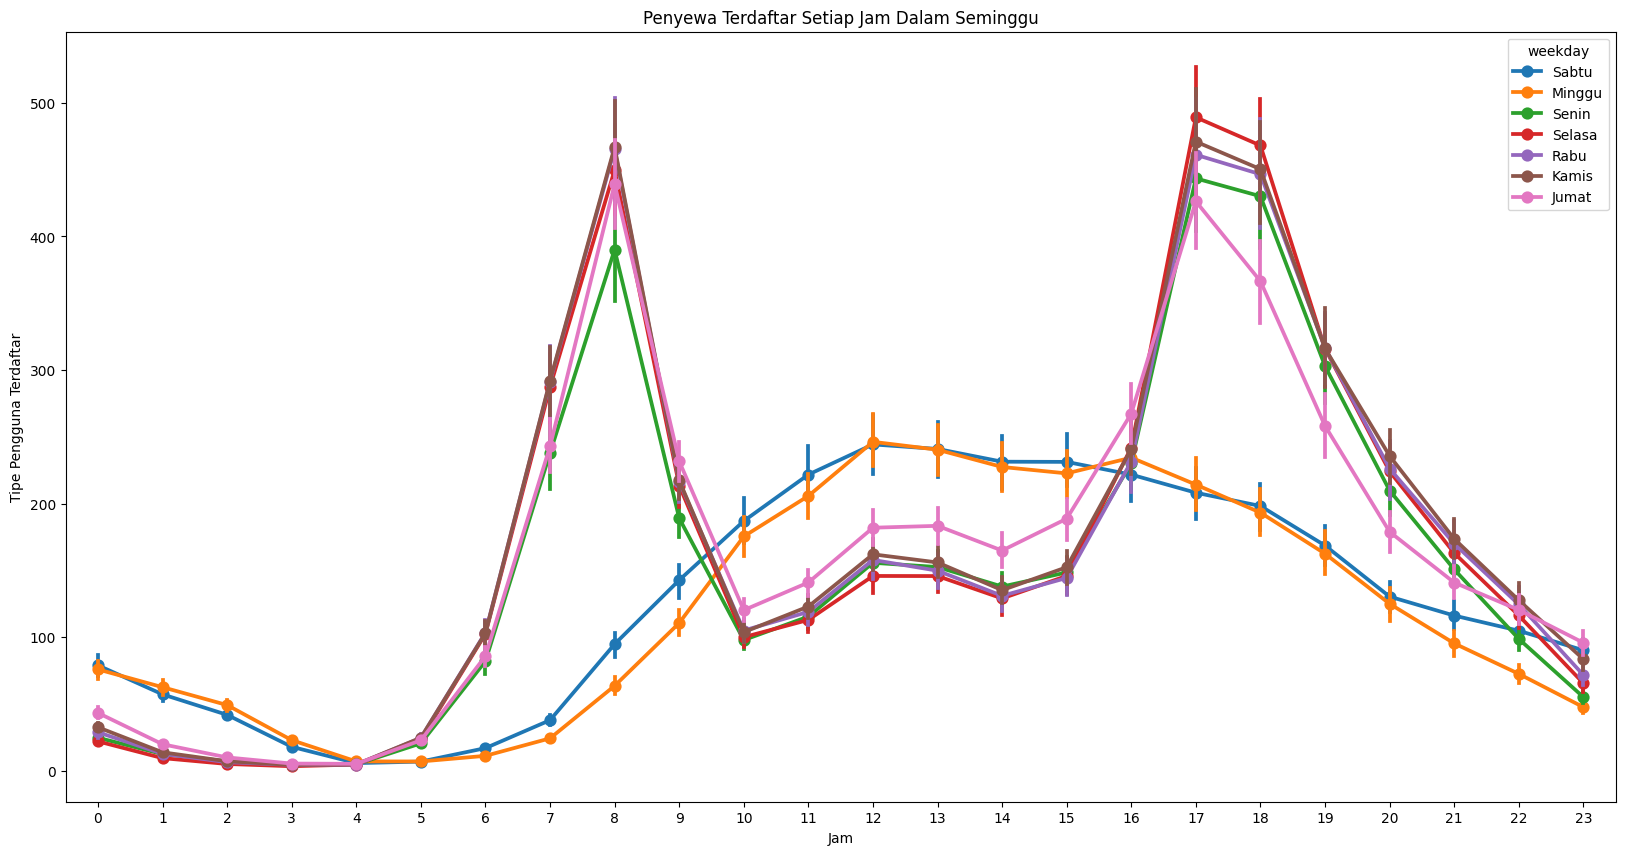

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='casual', hue='weekday')
plt.title('Penyewa biasa Setiap Jam Dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Tipe Pengguna biasa')
plt.show()

plt.figure(figsize=(20,10))
sns.pointplot(data=hour_df, x='hour', y='registered', hue='weekday')
plt.title('Penyewa Terdaftar Setiap Jam Dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Tipe Pengguna Terdaftar')
plt.show()

**Insight:**
- Pola yang ditampilkan hampir sama dengan jumlah penyewa setiap harinya. Dilihat lebih detail bahwa pengguna biasa meningkat dan banyak melakukan penyewaan di akhir pekan. Sedangkan pengguna terdaftar meningkat pada hari kerja, mayoritas merupakan pekerja yang sering menggunakan jasa penyewaan sepeda sebagai kendaraan untuk berangkat dan pulang kerja

## Conclusion

1.   Dampak kondisi cuaca terhadap penyewaan sepeda  
Cuaca cerah dan mendung adalah kondisi cuaca yang paling disukai oleh pengguna untuk melakukan penyewaan sepeda. Oleh karena itu, perusahaan dapat meningkatkan promosi dan iklan pada cuaca cerah dan mendung untuk meningkatkan penyewaan sepeda.   
Untuk meningkatkan penyewaan sepeda pada musim semi, perusahaan dapat menawarkan diskon atau promosi khusus untuk pengguna yang melakukan penyewaan sepeda pada cuaca gerimis atau hujan lebat. Selain itu, perusahaan juga dapat meningkatkan kualitas sepeda dan peralatan untuk memastikan keselamatan pengguna pada cuaca buruk.


2.   Perbedaan antara pengguna biasa dan pengguna terdaftar  
Mayoritas pengguna sudah melakukan pendaftaran, namun masih ada sekitar 20% pengguna biasa yang belum melakukan pendaftaran. Oleh karena itu, perusahaan dapat meningkatkan promosi dan iklan untuk meningkatkan kesadaran pengguna tentang keuntungan menjadi pengguna terdaftar.   
Untuk meningkatkan jumlah pengguna terdaftar, perusahaan dapat menawarkan keuntungan khusus untuk pengguna terdaftar, seperti diskon atau prioritas dalam melakukan penyewaan sepeda. Selain itu, perusahaan juga dapat meningkatkan kemudahan dalam proses pendaftaran untuk meningkatkan jumlah pengguna terdaftar.

3. Perbedaan jumlah penyewaan sepeda setiap jamnya antara hari kerja dan akhir pekan  
Jumlah penyewa pada hari kerja meningkat pada jam 7-9 dan jam 17-18, sedangkan pada libur jumlah penyewa banyak pada siang dan sore hari dari pukul 10-18. Oleh karena itu, perusahaan dapat meningkatkan promosi dan iklan pada jam-jam tersebut untuk meningkatkan penyewaan sepeda.   
Untuk meningkatkan penyewaan sepeda pada hari kerja, perusahaan dapat menawarkan diskon atau promosi khusus untuk pengguna yang melakukan penyewaan sepeda pada jam berangkat dan pulang kerja. Selain itu, perusahaan juga dapat meningkatkan kualitas sepeda dan peralatan untuk memastikan keselamatan pengguna pada jam sibuk.



### Analisis Lanjutan Clustering

Pola penyewaan sepeda oleh pengguna biasa dan pengguna terdaftar pada hari-hari tertentu dalam seminggu  
Pola penyewaan sepeda oleh pengguna biasa dan pengguna terdaftar hampir sama dengan jumlah penyewa setiap harinya. Namun, pengguna biasa meningkat dan banyak melakukan penyewaan di akhir pekan, sedangkan pengguna terdaftar meningkat pada hari kerja.

| Klaster   | Karakteristik   |
|------------|------------|
| Cluster 1 (Pengguna Biasa)| Muda, aktif, suka berolahraga/sedang berwisata|
| Cluster 2 (Pengguna Terdaftar)| Dewasa, stabil, sudah bekerja

Untuk meningkatkan penyewaan sepeda pada akhir pekan, perusahaan dapat menawarkan diskon atau promosi khusus untuk pengguna biasa yang melakukan penyewaan sepeda pada akhir pekan. Selain itu, perusahaan juga dapat meningkatkan kualitas sepeda dan peralatan untuk memastikan keselamatan pengguna pada akhir pekan.
